## Some graphs and plots for the thesis

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

In [4]:
june_df = pl.read_csv('../unclean_data/2023_06_data.csv', columns=['EAN_SHA256', 'LDN', 'ODN', 'READINGDATE'],
                 try_parse_dates=True,
                 new_columns=[f.lower() for f in ['EAN_SHA256', 'LDN', 'ODN', 'READINGDATE']])
may_df = pl.read_csv('../unclean_data/2023_05_data.csv', columns=['EAN_SHA256', 'LDN', 'ODN', 'READINGDATE'],
                 try_parse_dates=True,
                 new_columns=[f.lower() for f in ['EAN_SHA256', 'LDN', 'ODN', 'READINGDATE']]).with_columns(pl.col('readingdate').dt.convert_time_zone('Europe/Amsterdam'))

july_df = pl.read_csv('../unclean_data/2023_07_data.csv', columns=['EAN_SHA256', 'LDN', 'ODN', 'READINGDATE'],
                 try_parse_dates=True,
                 new_columns=[f.lower() for f in ['EAN_SHA256', 'LDN', 'ODN', 'READINGDATE']]).with_columns(pl.col('readingdate').dt.convert_time_zone('Europe/Amsterdam'))

june_df  = june_df.with_columns(pl.col('readingdate').dt.convert_time_zone('Europe/Amsterdam'))

june_pv_agg = pl.read_csv('../data/2023_06_cleaned_pv.csv',
                 try_parse_dates=True).with_columns(pl.col('readingdate').dt.convert_time_zone('Europe/Amsterdam')).to_pandas()


june_nonpv_agg = pl.read_csv('../data/2023_06_cleaned_non_pv.csv',
                 try_parse_dates=True).with_columns(pl.col('readingdate').dt.convert_time_zone('Europe/Amsterdam')).to_pandas()

In [5]:
print('may', may_df['ean_sha256'].unique())
print('june', june_df['ean_sha256'].unique())
print('july', july_df['ean_sha256'].unique())
print('total', pl.concat([may_df['ean_sha256'], june_df['ean_sha256'], july_df['ean_sha256']]).unique())

may shape: (5_053,)
Series: 'ean_sha256' [str]
[
	"52E778BF5413F0…
	"68B87ABAF9207A…
	"89C596D68B9F45…
	"58891E8A90C450…
	"7C69A9F85F323F…
	…
	"7BA4802A320622…
	"492A164A82D14D…
	"2959A97FC62E06…
	"E977067C8A20E1…
	"F953CF708DE193…
]
june shape: (5_207,)
Series: 'ean_sha256' [str]
[
	"7A33C3869D4446…
	"F3CD5DEF70B073…
	"2F4361BA563FC5…
	"9556DF1F47824B…
	"0FCFCB0927FCA7…
	…
	"585DC907880DBD…
	"A1BD337F96C50B…
	"7E75969CB35181…
	"6CE9739DB822FF…
	"8B4D571ACEDB8A…
]
july shape: (5_631,)
Series: 'ean_sha256' [str]
[
	"B321A57DC4338C…
	"6B0EBE51791335…
	"00B88AB389140B…
	"B2E3DAE130235A…
	"E327D5800A7384…
	…
	"E5734D202B6A18…
	"02AAB012F337A5…
	"BB523BB81414CF…
	"6A89581A3FE9B6…
	"BB439D587515C4…
]
total shape: (5_682,)
Series: 'ean_sha256' [str]
[
	"7C1177BAF61626…
	"1B25F37F6E080E…
	"885F3537EE43A7…
	"CB23CD9A737137…
	"3E7A4B47A21C51…
	…
	"F421472F30F186…
	"9F7D4780D85620…
	"B50AED8E52521B…
	"5E53561F850097…
	"A48A322B5E0761…
]


D6F6AAA4578202E0B3D6834AB480FE8EB2ABD53107D6D3815113C44EEB560F89


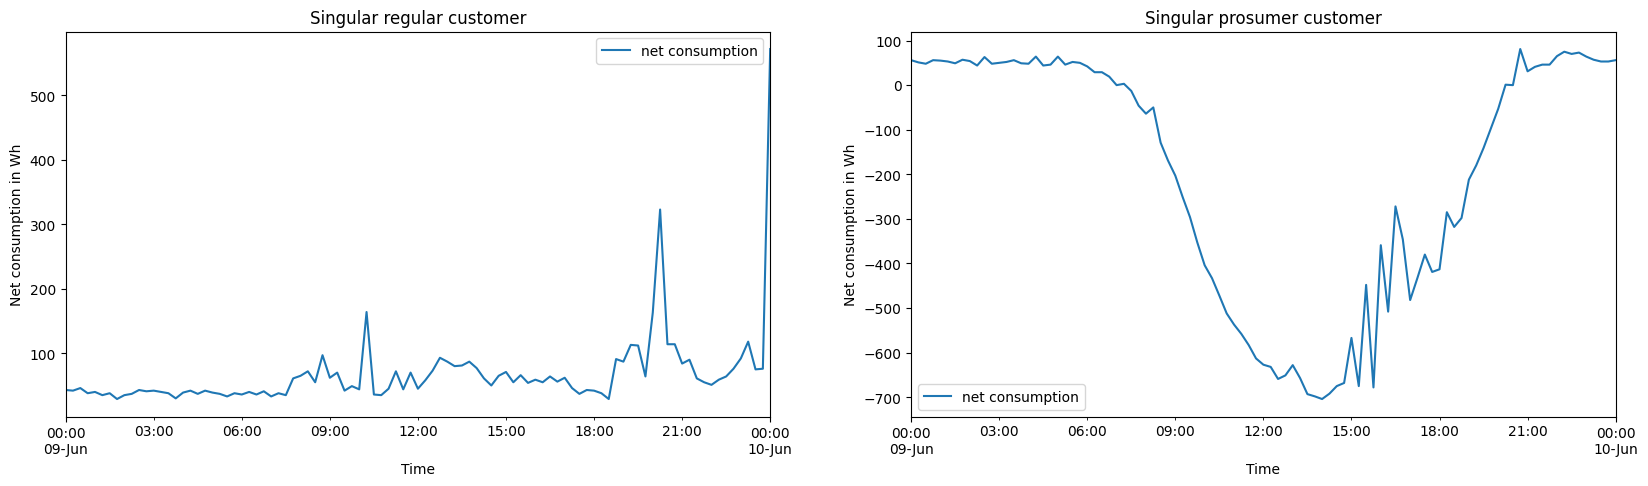

In [65]:
random_ean =  june_df['ean_sha256'].sample(1)
print(random_ean[0])

# random_ean='EFE7458D9C15C7E397425D0FBA11643FD386C055F66CC96FF4048B96B5A03B52' # non_pv 
# random_ean = 'EACC27D51F44E3BBB835A59FB8F0C0194943B640452A5CEA985DEBBCA22707E5'# pv 

random_ean = '423CD0763B2C61280EBB3978BC2B4CC7608C4D99F37BE61CD489B83AF4FD7F87' # non pv
# random_ean = '857CA4BA754FFFC00344EF37EA9AC8F2A1EA3CFF5CE5CF69A022D868EC1D17ED' # non pv
# funny shape 7708304F59EDECD52197165E61813E81FD37FAD44308B7791D8507FC3633E8A4
subset = june_df.filter(pl.col('ean_sha256') == random_ean).to_pandas()

# .plot(x='readingdate')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharex=True)

subset.sort_values(by='readingdate', inplace=True)
subset['ldn'] = subset['ldn'].astype(float) 
subset['odn'] = subset['odn'].astype(float)
subset['ldn'] = subset.groupby('ean_sha256')['ldn'].diff()
subset['odn'] = subset.groupby('ean_sha256')['odn'].diff()
subset['net consumption'] = subset['ldn'] - subset['odn']

s, e = '2023-06-09', '2023-06-10'
subset = subset[(subset['readingdate'] >= s) & (subset['readingdate'] <= e)]
# subset.set_index('readingdate')[['ldn', 'odn']].plot()
subset.set_index('readingdate')[['net consumption']].plot(ax=axes[0], title='Singular regular customer')



random_ean = 'EACC27D51F44E3BBB835A59FB8F0C0194943B640452A5CEA985DEBBCA22707E5'# pv 
subset = june_df.filter(pl.col('ean_sha256') == random_ean).to_pandas()

subset.sort_values(by='readingdate', inplace=True)
subset['ldn'] = subset['ldn'].astype(float) 
subset['odn'] = subset['odn'].astype(float)
subset['ldn'] = subset.groupby('ean_sha256')['ldn'].diff()
subset['odn'] = subset.groupby('ean_sha256')['odn'].diff()
subset['net consumption'] = subset['ldn'] - subset['odn']

s, e = '2023-06-09', '2023-06-10'
subset = subset[(subset['readingdate'] >= s) & (subset['readingdate'] <= e)]
# subset.set_index('readingdate')[['ldn', 'odn']].plot()
subset.set_index('readingdate')[['net consumption']].plot(ax=axes[1], title='Singular prosumer customer')

axes[0].set_ylabel('Net consumption in Wh')
axes[0].set_xlabel('Time')

axes[1].set_ylabel('Net consumption in Wh')
axes[1].set_xlabel('Time')

fig.savefig('../03_results/prosumer_consumer.png')


<Axes: xlabel='readingdate'>

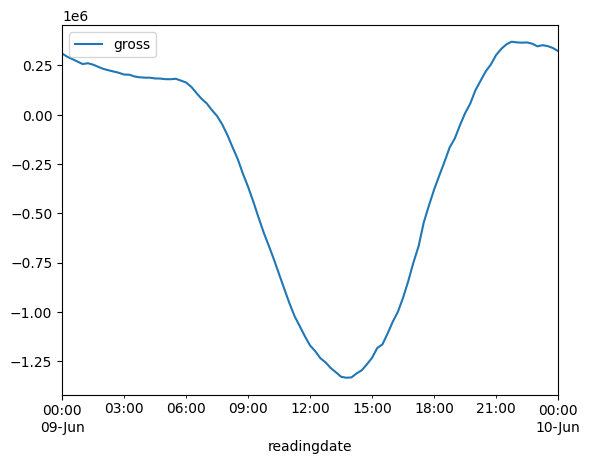

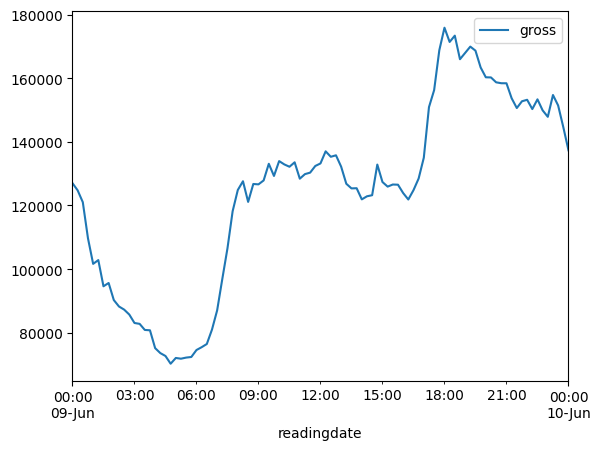

In [96]:
# june_pv_agg = june_pv_agg[(subset['readingdate'] >= s) & (june_pv_agg['readingdate'] <= e)]
ax = june_pv_agg[(june_pv_agg['readingdate'] >= s) & (june_pv_agg['readingdate'] <= e)].set_index('readingdate')[['gross']].plot()
june_nonpv_agg[(june_nonpv_agg['readingdate'] >= s) & (june_nonpv_agg['readingdate'] <= e)].set_index('readingdate')[['gross']].plot()


In [4]:
def pv_split(_df):
    sum_odn = _df.group_by('ean_sha256').agg(pl.col('odn').sum())

    pv = _df.filter(pl.col('ean_sha256').is_in(sum_odn.filter(pl.col('odn') > 0)['ean_sha256']))
    non_pv = _df.filter(pl.col('ean_sha256').is_in(sum_odn.filter(pl.col('odn') <= 0)['ean_sha256']))

    print(pv, non_pv)
    print(len(pv) + len(non_pv), len(_df))
    return pv, non_pv
